This Notebook tries to showcase some of the uncertainties in working with raw AIS data. The data is sourced from the Danish Maritime Authorities publicly available AIS data. The notebook loads the data, investigates the distribution of latitude & longitude in the data, finds an example with faulty data measurements and plots this as a scatterplot to visualize the data. A similar analysis could be done with the speed measurements. 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
#Load AIS data for the 1st of February 2025 as an example. 
df = pd.read_csv(Path("data/DMA_ais_example/aisdk-2025-02-01.csv"))

In [3]:
#Load coastline data from Natural Earth source
coastline = gpd.read_file(Path("data/ne_10m_coastline/ne_10m_coastline.shp"))

In [4]:
print(df['Type of mobile'].unique())

['Class A' 'Base Station' 'AtoN' 'Class B' 'Search and Rescue Transponder'
 'SAR Airborne' 'Man Overboard Device' 'Emergency PIRB']


In [5]:
#filter for ships
ships = df[(df['Type of mobile']=="Class A") | (df['Type of mobile']=="Class B")] #Class A is large commercial ships, CLass B is usually recreational, smaller vessels. 
display(ships)

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,...,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
0,01/02/2025 00:00:00,Class A,219002493,55.599097,10.461417,Under way using engine,0.0,0.1,215.0,283.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
2,01/02/2025 00:00:00,Class A,220138000,57.491192,7.942197,Engaged in fishing,NaN,2.4,252.5,NaN,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
3,01/02/2025 00:00:00,Class A,235104964,54.995450,11.874843,Under way using engine,0.0,0.0,27.1,43.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
4,01/02/2025 00:00:00,Class A,235104964,54.995450,11.874843,Under way using engine,0.0,0.0,27.1,43.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
5,01/02/2025 00:00:00,Class A,636023191,57.599450,10.942250,Under way using engine,0.0,12.8,289.0,290.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17743542,01/02/2025 23:59:58,Class A,265586950,55.372347,13.143850,Under way using engine,NaN,0.0,254.6,136.0,...,12.0,GPS,0.9,SWEDISH SAR VESSEL,10/04/2025 09:30:00,AIS,8.0,4.0,2.0,2.0
17743543,01/02/2025 23:59:58,Class A,219001553,57.321525,11.127785,Engaged in fishing,0.0,0.0,154.7,322.0,...,10.0,GPS,NaN,Unknown,18/04/2025 00:00:00,AIS,3.0,7.0,2.0,2.0
17743544,01/02/2025 23:59:58,Class A,244130642,55.094967,14.077283,Under way using engine,0.0,11.4,216.8,218.0,...,90.0,GPS,5.6,NLAMS,03/02/2025 18:00:00,AIS,78.0,12.0,11.0,2.0
17743545,01/02/2025 23:59:58,Class A,219000643,55.260207,9.730320,Under way sailing,0.0,0.0,149.2,284.0,...,30.0,GPS,NaN,Unknown,01/01/2026 01:01:00,AIS,15.0,15.0,5.0,5.0


Below plot shows the main area covered by the data sample. (Already here, note that there are samples placed on land.)

C:\Users\nssj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


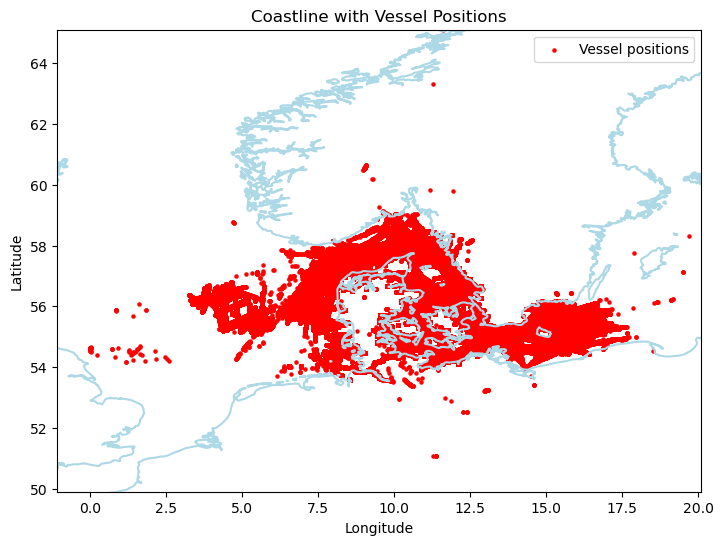

In [6]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the coastline
coastline.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot vessel positions without connecting lines
ax.scatter(ships['Longitude'], ships['Latitude'], color='red', label='Vessel positions', s=5)

# Add titles and labels
ax.set_title('Coastline with Vessel Positions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set zoom level by adjusting axis limits
buffer = 0.1  # Adjust buffer size for zoom effect
min_lon, max_lon = -1,20
min_lat, max_lat = 50, 65

ax.set_xlim(min_lon - buffer, max_lon + buffer)
ax.set_ylim(min_lat - buffer, max_lat + buffer)

# Add legend
ax.legend()

# Show the plot
plt.show()

Below is a bit of data exploration, showcasing the type and minimal amount of information regarding Ship Type contained in AIS data. 

In [7]:
display(df.columns)

Index(['# Timestamp', 'Type of mobile', 'MMSI', 'Latitude', 'Longitude',
       'Navigational status', 'ROT', 'SOG', 'COG', 'Heading', 'IMO',
       'Callsign', 'Name', 'Ship type', 'Cargo type', 'Width', 'Length',
       'Type of position fixing device', 'Draught', 'Destination', 'ETA',
       'Data source type', 'A', 'B', 'C', 'D'],
      dtype='object')

In [8]:
shiptype = df[df['Ship type'].notna()]
print(shiptype['Ship type'].unique())

['Undefined' 'Cargo' 'Fishing' 'Other' 'Sailing' 'Pilot' 'Passenger'
 'Tanker' 'Pleasure' 'SAR' 'Diving' 'Military' 'Towing' 'Tug' 'Dredging'
 'HSC' 'Spare 1' 'Law enforcement' 'Reserved' 'Port tender'
 'Anti-pollution' 'WIG' 'Medical' 'Not party to conflict' 'Spare 2'
 'Towing long/wide']


Below is a exploration of the values of latitude and longitude. We know the AIS data is based on the seas around Denmark, so it would be reasonable to expect values close to the latitude/longitude of Denmark. Note the min and max values. 

In [9]:
#Data exploration, print summary statistics of latitude & longitude, note the min values.
long = df['Longitude']
lat = df['Latitude']

print('Latitude:')
print(lat.describe())
print('Longitude')
print(long.describe())

Latitude:
count    1.774355e+07
mean     5.632312e+01
std      2.655688e+00
min     -8.344041e+01
25%      5.524826e+01
50%      5.600456e+01
75%      5.729673e+01
max      9.100000e+01
Name: Latitude, dtype: float64
Longitude
count    1.774355e+07
mean     1.093201e+01
std      2.075595e+00
min     -9.988166e+01
25%      9.958465e+00
50%      1.101939e+01
75%      1.205868e+01
max      1.796923e+02
Name: Longitude, dtype: float64


Notice how the max latitude is ~91 and the min value is ~-8.3, likewise the min value for longitude is ~9.98 and the max value is ~179

We do a bit further exploration and find a sample vessel where a latitude of -8.3 occurs. 

In [10]:
#Find row with minimum value of latitude:
min_lat = df.query('Latitude==Latitude.min()')

#Extract MMSI of Vessel with the minimum value of latitude, i.e. incorrect data.
Faulty_mmsi = min_lat['MMSI'].iloc[0]

#Subset DF for Faulty MMSI vessel
Faulty_vessel = df.query('MMSI==@Faulty_mmsi')
print(Faulty_vessel)


                  # Timestamp Type of mobile       MMSI   Latitude  Longitude  \
441       01/02/2025 00:00:02        Class A  219000429  54.514983  11.238233   
443       01/02/2025 00:00:02        Class A  219000429  54.514983  11.238233   
753       01/02/2025 00:00:03        Class A  219000429  54.514917  11.238200   
1217      01/02/2025 00:00:05        Class A  219000429  54.514750  11.238083   
1221      01/02/2025 00:00:05        Class A  219000429  54.514750  11.238083   
...                       ...            ...        ...        ...        ...   
17742240  01/02/2025 23:59:52        Class A  219000429  54.518800  11.241333   
17743320  01/02/2025 23:59:57        Class A  219000429  54.518417  11.241050   
17743321  01/02/2025 23:59:57        Class A  219000429  54.518417  11.241050   
17743322  01/02/2025 23:59:57        Class A  219000429  54.518417  11.241050   
17743323  01/02/2025 23:59:57        Class A  219000429  54.518417  11.241050   

             Navigational s

Below plot shows the GPS position of the vessel on a world map.
It shows how the position jumps from near Denmark to the middle of Russia, Antarctica and the UK.

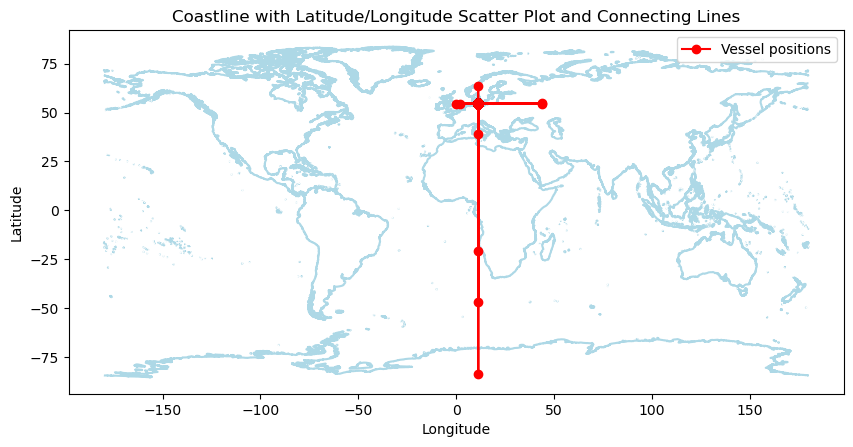

In [11]:
# Plot the coastline from the GeoPandas DataFrame
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the coastline as a base layer
coastline.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the scatter plot with connecting lines from the Faulty_vessel DataFrame
ax.plot(Faulty_vessel['Longitude'], Faulty_vessel['Latitude'], marker='o', linestyle='-', color='red', label='Vessel positions')

# Add titles and labels
ax.set_title('Coastline with Latitude/Longitude Scatter Plot and Connecting Lines')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


# Optionally, add a legend
ax.legend()

# Show the plot
plt.show()


Below shows the positions with the map zoomed into the palce where the vessel normally is (It's the Roedby - Puttgarten ferry it turns out.)

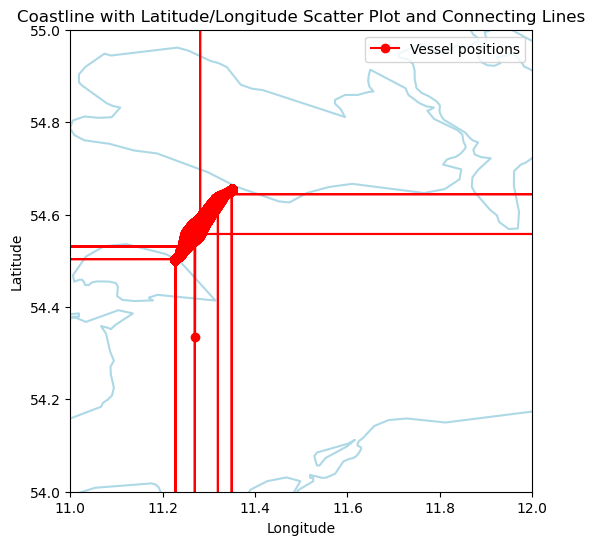

In [12]:
# Plot the coastline from the GeoPandas DataFrame
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the coastline as a base layer
coastline.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the scatter plot with connecting lines from the Faulty_vessel DataFrame
ax.plot(Faulty_vessel['Longitude'], Faulty_vessel['Latitude'], marker='o', linestyle='-', color='red', label='Vessel positions')

# Add titles and labels
ax.set_title('Coastline with Latitude/Longitude Scatter Plot and Connecting Lines')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set the zoom area for the plot (latitude 40-60 and longitude 0-10)
ax.set_xlim(11, 12)        # Longitude range: 0 to 10 degrees East
ax.set_ylim(54, 55)       # Latitude range: 40 to 60 degrees North

# Optionally, add a legend
ax.legend()

# Show the plot
plt.show()


Likewise we can it for the case of max longitude.

In [13]:
#Find row with minimum value of latitude:
min_lat = df.query('Longitude==Longitude.max()')

#Extract MMSI of Vessel with the minimum value of latitude, i.e. incorrect data.
Faulty_mmsi = min_lat['MMSI'].iloc[0]

#Subset DF for Faulty MMSI vessel
Faulty_vessel = df.query('MMSI==@Faulty_mmsi')
print(Faulty_vessel)


                  # Timestamp Type of mobile       MMSI   Latitude  Longitude  \
22046     01/02/2025 00:01:58        Class A  636019341  55.755983  16.203793   
32119     01/02/2025 00:02:52        Class A  636019341  55.754937  16.196627   
35427     01/02/2025 00:03:10        Class A  636019341  55.754568  16.194208   
37607     01/02/2025 00:03:23        Class A  636019341  55.754310  16.192482   
38564     01/02/2025 00:03:28        Class A  636019341  55.754220  16.191818   
...                       ...            ...        ...        ...        ...   
17741941  01/02/2025 23:59:50        Class A  636019341  57.247472  11.592635   
17743046  01/02/2025 23:59:56        Class A  636019341  57.247895  11.592380   
17743047  01/02/2025 23:59:56        Class A  636019341  57.247895  11.592380   
17743050  01/02/2025 23:59:56        Class A  636019341  57.247895  11.592380   
17743051  01/02/2025 23:59:56        Class A  636019341  57.247895  11.592380   

             Navigational s

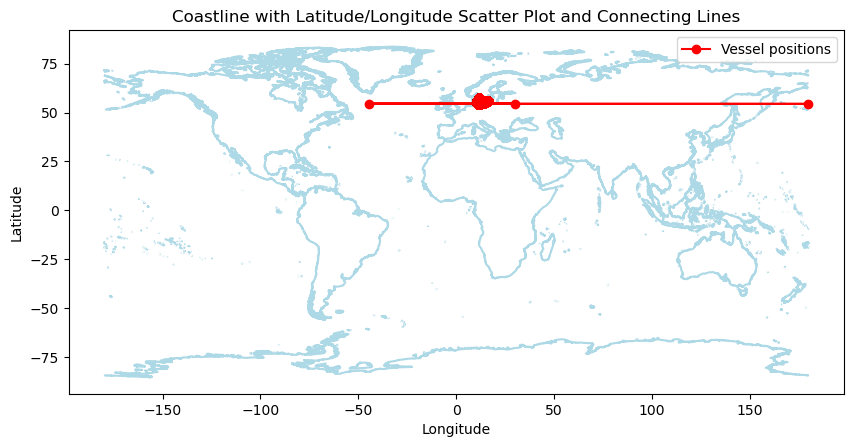

In [14]:
# Plot the coastline from the GeoPandas DataFrame
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the coastline as a base layer
coastline.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the scatter plot with connecting lines from the Faulty_vessel DataFrame
ax.plot(Faulty_vessel['Longitude'], Faulty_vessel['Latitude'], marker='o', linestyle='-', color='red', label='Vessel positions')

# Add titles and labels
ax.set_title('Coastline with Latitude/Longitude Scatter Plot and Connecting Lines')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


# Optionally, add a legend
ax.legend()

# Show the plot
plt.show()


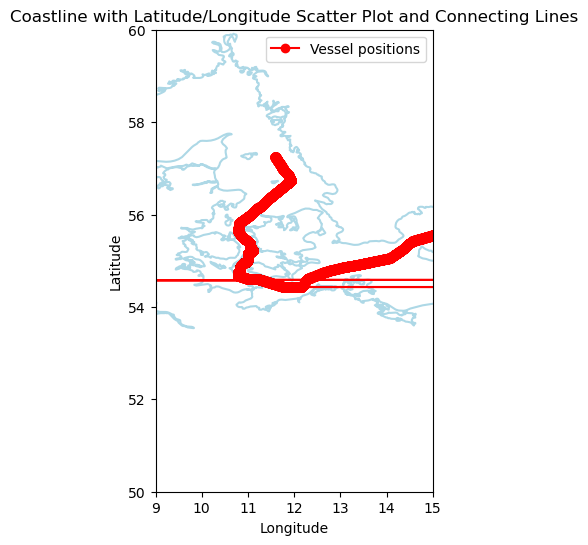

In [15]:
# Plot the coastline from the GeoPandas DataFrame
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the coastline as a base layer
coastline.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the scatter plot with connecting lines from the Faulty_vessel DataFrame
ax.plot(Faulty_vessel['Longitude'], Faulty_vessel['Latitude'], marker='o', linestyle='-', color='red', label='Vessel positions')

# Add titles and labels
ax.set_title('Coastline with Latitude/Longitude Scatter Plot and Connecting Lines')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set the zoom area for the plot (latitude 40-60 and longitude 0-10)
ax.set_xlim(9, 15)        # Longitude range: 0 to 10 degrees East
ax.set_ylim(50, 60)       # Latitude range: 40 to 60 degrees North

# Optionally, add a legend
ax.legend()

# Show the plot
plt.show()


This notebook tries to illustrate the uncertainties inherent in raw AIS data. When working with AIS data it is important to be critical of the values it shows. Some are manual inputs from the operators, some are sensor inputs. Both cases might be prone to error, and the transmission and receiving of AIS signals may also cause noise.

The book Maritime Data Analytics contains a chapter describing methods to cleaning and processing AIS data prior to analysis, which is quite nice. It is available on this link: 

https://link.springer.com/content/pdf/10.1007/978-3-030-61852-0_4.pdf

One of the authors, Panagiotis Tampakis, is an Associate Professor at IMADA, SDU and could be a source of guidance on processing the AIS data. 


